<a href="https://colab.research.google.com/github/Jahnavi-Majji/kaggle-digit-recognition/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Dense, Input, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split

In [3]:
print(tf.__version__)

2.3.0


**CNN Architecture**

*(Conv2D => Conv2D => MaxPooling => Dropout ) *2 => Flatten => Fully connected layer => => Dropout => Output*



In [51]:
def VGG_model(input_shape = (32, 32, 1), classes = 10):

  model = Sequential([
            Conv2D(filters = 32, kernel_size= (5, 5), padding= 'Same', activation= 'relu', input_shape= (32, 32, 1)),
            Conv2D(filters = 32, kernel_size= (5, 5), padding= 'Same', activation= 'relu', input_shape= (32, 32, 1)),
            MaxPooling2D(pool_size= (2, 2), strides=(2, 2)),
            Dropout(0.25),
            Conv2D(filters = 64, kernel_size= (3, 3), padding= 'Same', activation= 'relu'),
            Conv2D(filters = 64, kernel_size= (3, 3), padding= 'Same', activation= 'relu'),
            MaxPooling2D(pool_size= (2, 2), strides=(2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(256, activation= 'relu'),
            Dropout(0.25),
            Dense(10, activation= 'softmax')
  ])
  return model

In [52]:
Model1 = VGG_model(input_shape=(32, 32, 1), classes = 10)
Model1.compile(optimizer= 'rmsprop', metrics= ['accuracy'], loss= 'categorical_crossentropy')
Model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        832       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [7]:
data_generator = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center= False,
    zca_whitening= False,
    featurewise_std_normalization= False,
    samplewise_std_normalization= False,
    rotation_range= 10,
    width_shift_range= 0.1,
    height_shift_range= 0.1, 
    zoom_range= 0.1,
    horizontal_flip= False,
    vertical_flip= False
)

**Implementing another model LeNet 5**

*(Conv2D => Conv2D --> BatchNorm => MaxPooling => Dropout) *2 => Flatten => (Fully Connected => BatchNorm) *3 => Dropout => Output*


In [44]:
def LeNet5v2(input_shape = (32, 32, 1), classes = 10):
    
    model = Sequential([
    Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,1), kernel_regularizer=l2(0.0005), name = 'convolution_1'),
    Conv2D(filters = 32, kernel_size = 5, strides = 1, name = 'convolution_2', use_bias=False),
    BatchNormalization(name = 'batchnorm_1'),
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_1'),
    Dropout(0.25, name = 'dropout_1'),
    Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', kernel_regularizer=l2(0.0005), name = 'convolution_3'),
    Conv2D(filters = 64, kernel_size = 3, strides = 1, name = 'convolution_4', use_bias=False),
    BatchNormalization(name = 'batchnorm_2'),
    Activation("relu"),
    MaxPooling2D(pool_size = 2, strides = 2, name = 'max_pool_2'),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),
    Dense(units = 256, name = 'fully_connected_1', use_bias=False),
    BatchNormalization(name = 'batchnorm_3'),
    Activation("relu"),
    Dense(units = 128, name = 'fully_connected_2', use_bias=False),
    BatchNormalization(name = 'batchnorm_4'),
    Activation("relu"),
    Dense(units = 84, name = 'fully_connected_3', use_bias=False),
    BatchNormalization(name = 'batchnorm_5'),
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),
    Dense(units = 10, activation = 'softmax', name = 'output')
        
    ])
    
    model._name = 'LeNet5v2'

    return model

In [45]:
LeNet5Model = LeNet5v2(input_shape = (32, 32, 1), classes = 10)

In [46]:
LeNet5Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
LeNet5Model.summary()

Model: "LeNet5v2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convolution_1 (Conv2D)       (None, 28, 28, 32)        832       
_________________________________________________________________
convolution_2 (Conv2D)       (None, 24, 24, 32)        25600     
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
convolution_3 (Conv2D)       (None, 10, 10, 64)        184

In [11]:
%matplotlib inline
import matplotlib.image  as mpimg

def plot_graphs(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epoch = range(len(acc))

  #plot accuracy
  plt.plot(epoch, acc, 'r', "Train Accuracy")
  plt.plot(epoch, val_acc, 'b', "Dev Accuracy")
  plt.figure()

  #plot losses
  plt.plot(epoch, loss, 'r', "Train Loss")
  plt.plot(epoch, val_loss, 'b', "Dev Loss")
  plt.figure()

In [25]:
#loading the dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [26]:
path = '/content/gdrive/My Drive/Colab Notebooks/data'

In [27]:
import os
os.listdir(path)

['dataset', 'test.csv', 'train.csv']

In [28]:
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

In [29]:
Y = train[['label']]
X = train.drop(train.columns[[0]], axis = 1)

X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

print("Size of Dataset: " , len(X))

Size of Dataset:  42000


In [30]:
dev_set_size = int(len(X) * 0.05)
x_train, x_dev, y_train, y_dev = train_test_split(X, Y, test_size = dev_set_size, random_state = 42)

In [31]:
x_test = test
print("Size of dev set: ", dev_set_size)

Size of dev set:  2100


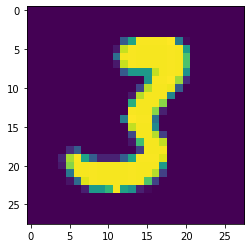

In [32]:
plt.imshow(x_train[0][:, :, 0])

In [33]:
#convert into numpy arrays
x_train = np.array(x_train)
x_dev = np.array(x_dev)
x_test = np.array(x_test)

In [34]:
#padding the image by 2 pixels
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_dev = np.pad(x_dev, ((0,0),(2,2),(2,2),(0,0)), 'constant')
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [35]:
#normalization
mean = x_train.mean().astype(np.float32)
std = x_train.std().astype(np.float32)
x_train = (x_train - mean) / std

mean = x_dev.mean().astype(np.float32)
std = x_dev.std().astype(np.float32)
x_dev = (x_dev - mean) / std

mean = x_test.mean().astype(np.float32)
std = x_test.std().astype(np.float32)
x_test = (x_test - mean) / std


In [36]:
y_train = to_categorical(y_train, num_classes = 10)
y_dev = to_categorical(y_dev, num_classes = 10)

In [37]:
lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 2)

In [48]:
history = LeNet5Model.fit(x_train, y_train, epochs = 30, batch_size = 64, callbacks = [lr], validation_data = (x_dev,y_dev))

Epoch 1/30
624/624 [==============================] - 8s 13ms/step - loss: 0.2580 - accuracy: 0.9332 - val_loss: 0.0873 - val_accuracy: 0.9790
Epoch 2/30
624/624 [==============================] - 7s 12ms/step - loss: 0.0956 - accuracy: 0.9778 - val_loss: 0.0751 - val_accuracy: 0.9814
Epoch 3/30
624/624 [==============================] - 7s 12ms/step - loss: 0.0769 - accuracy: 0.9816 - val_loss: 0.0582 - val_accuracy: 0.9862
Epoch 4/30
624/624 [==============================] - 7s 12ms/step - loss: 0.0651 - accuracy: 0.9847 - val_loss: 0.0425 - val_accuracy: 0.9924
Epoch 5/30
624/624 [==============================] - 7s 12ms/step - loss: 0.0556 - accuracy: 0.9868 - val_loss: 0.0542 - val_accuracy: 0.9881
Epoch 6/30
624/624 [==============================] - 8s 12ms/step - loss: 0.0500 - accuracy: 0.9877 - val_loss: 0.0678 - val_accuracy: 0.9819
Epoch 7/30
624/624 [==============================] - 7s 12ms/step - loss: 0.0362 - accuracy: 0.9921 - val_loss: 0.0278 - val_accuracy: 0.9933

In [54]:
print("Plotting Graphs for LeNet5 Model")

Plotting Graphs for LeNet5 Model


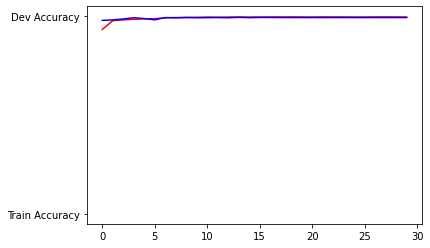

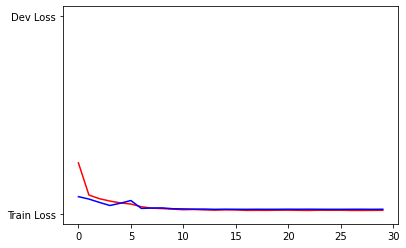

<Figure size 432x288 with 0 Axes>

In [49]:
plot_graphs(history)

In [56]:
results = LeNet5Model.predict(x_test)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("LeNetv2.csv",index=False)